In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [18]:
  

from google.colab import files
  
  
uploaded = files.upload()

Saving Fish.csv to Fish.csv


In [31]:
df1=uploaded
df1

{'Fish.csv': b'\xef\xbb\xbfSpecies,Weight,Length1,Length2,Length3,Height,Width\r\nBream,242,23.2,25.4,30,11.52,4.02\r\nBream,290,24,26.3,31.2,12.48,4.3056\r\nBream,340,23.9,26.5,31.1,12.3778,4.6961\r\nBream,363,26.3,29,33.5,12.73,4.4555\r\nBream,430,26.5,29,34,12.444,5.134\r\nBream,450,26.8,29.7,34.7,13.6024,4.9274\r\nBream,500,26.8,29.7,34.5,14.1795,5.2785\r\nBream,390,27.6,30,35,12.67,4.69\r\nBream,450,27.6,30,35.1,14.0049,4.8438\r\nBream,500,28.5,30.7,36.2,14.2266,4.9594\r\nBream,475,28.4,31,36.2,14.2628,5.1042\r\nBream,500,28.7,31,36.2,14.3714,4.8146\r\nBream,500,29.1,31.5,36.4,13.7592,4.368\r\nBream,340,29.5,32,37.3,13.9129,5.0728\r\nBream,600,29.4,32,37.2,14.9544,5.1708\r\nBream,600,29.4,32,37.2,15.438,5.58\r\nBream,700,30.4,33,38.3,14.8604,5.2854\r\nBream,700,30.4,33,38.5,14.938,5.1975\r\nBream,610,30.9,33.5,38.6,15.633,5.1338\r\nBream,650,31,33.5,38.7,14.4738,5.7276\r\nBream,575,31.3,34,39.5,15.1285,5.5695\r\nBream,685,31.4,34,39.2,15.9936,5.3704\r\nBream,620,31.5,34.5,39.7,15.

In [35]:
df = pd.read_csv('Fish.csv')

In [36]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [37]:
#renaming of the colums
df.columns=['species','weight','vertical_len','diagonal_len','cross_len','height','width']

In [38]:
df.head()

,species,weight,vertical_len,diagonal_len,cross_len,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [39]:
#checkinh for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       159 non-null    object 
 1   weight        159 non-null    float64
 2   vertical_len  159 non-null    float64
 3   diagonal_len  159 non-null    float64
 4   cross_len     159 non-null    float64
 5   height        159 non-null    float64
 6   width         159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


**The Least Sq Regression Line**

In [47]:
x=np.array(df['vertical_len'])
y=np.array(df['weight'])
n = len(x)

#do calculation for slope

sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xx = np.sum(x*x)
sum_xy = np.sum(x*y)

#calculating mean of each

meanx = np.mean(x)
meany = np.mean(y)

#neumirator

neu  = sum_xy - ((sum_x*sum_y)/n)
den = sum_xx - ((sum_x*sum_x)/n)

# m and b are the slope and intercept calculated for given x and y values 

m = neu/den
b = meany - m*meanx


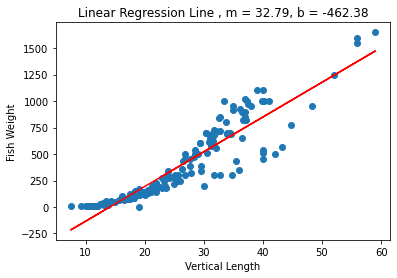

<Figure size 720x360 with 0 Axes>

In [50]:
# regression line plot

plt.scatter(x,y)
plt.plot(x, m*x+b, color='red')
plt.title(f'Linear Regression Line , m = {m:.2f}, b = {b:.2f}')
plt.ylabel("Fish Weight")
plt.xlabel("Vertical Length")
plt.figure(figsize=(10,5))
plt.show()

In [53]:
# The method calculates the correlation coefficient between all the numerical columns
corr = df.corr(method='pearson')
corr

,weight,vertical_len,diagonal_len,cross_len,height,width
weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
vertical_len,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
diagonal_len,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
cross_len,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


plot heat map


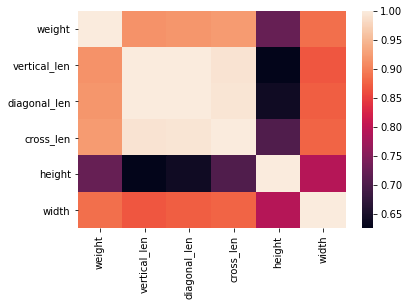

In [56]:
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels=corr.columns.values)

# **Splitting of data for Train Test**

In [57]:
from sklearn.model_selection import train_test_split
x = df.drop(['weight','species'], axis=1).values
y = df['weight'].values

X_train, X_test, Y_train, Y_test =  train_test_split( x,y,test_size=0.3, random_state=10)
# Shapes of the training and testing data

print(f'Shape of training set for X = {X_train.shape}')
print(f'Shape of testing  set for X = {X_test.shape}')
print(f'Shape of training set for Y = {Y_train.shape}')
print(f'Shape of testing  set for Y = {Y_test.shape}')

Shape of training set for X = (111, 5)
Shape of testing  set for X = (48, 5)
Shape of training set for Y = (111,)
Shape of testing  set for Y = (48,)


# **Appling Linear Regression Model**

In [62]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
Y_predict = linear_regression.predict(X_test)

# **Cofficient Determination**

In [63]:
import math

from sklearn.metrics import r2_score
r2 = r2_score(Y_test ,Y_predict)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.3f}')
print(f'     correlation coefficient = {r:.3f}')

coefficient of determination = 0.809
     correlation coefficient = 0.899


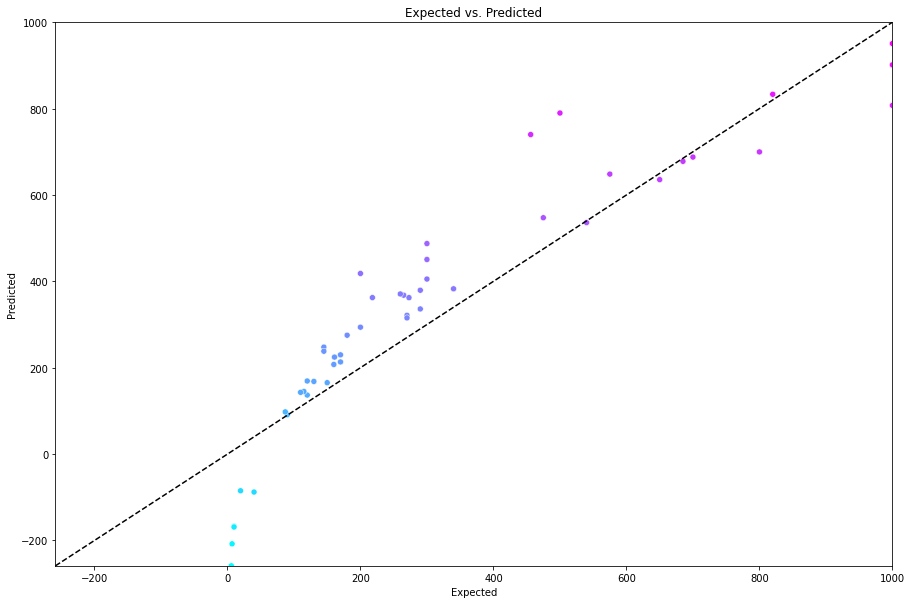

In [64]:
from sklearn import metrics

# Using Predicted values
predicted = Y_predict
expected  = Y_test
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

plt.title('Expected vs. Predicted')
line = plt.plot([start, end], [start, end], 'k--')